In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Завдання 1-2
data = pd.read_csv("museum_visitors.csv",encoding='cp1251')
data.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [3]:
#Завдання 3
shape = data.shape
print("Розмір датасету:", shape)

data_types = data.dtypes
print("Типи даних:")
print(data_types)

miss_values = data.isnull().sum()
print("Кількість пропусків у кожному стовпці:")
print(miss_values)

Розмір датасету: (59, 5)
Типи даних:
Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object
Кількість пропусків у кожному стовпці:
Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64


In [4]:
#Завдання 4
duplicate = data[data.duplicated()]
data = data.drop_duplicates()
shape = data.shape
print("Розмір таблиці після видалення дублікатів:", shape)

Розмір таблиці після видалення дублікатів: (59, 5)


In [7]:
#Завдання 5
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
years = data['Year'].unique()
print("Роки, для яких є дані в датасеті:")
print(years)

Роки, для яких є дані в датасеті:
[2014 2015 2016 2017 2018]


In [10]:
#Завдання 6
data.rename(columns={
    'Date': 'date',
    'Avila Adobe': 'avila_adobe',
    'Firehouse Museum': 'firehouse_museum',
    'Chinese American Museum': 'chinese_american_museum',
    'America Tropical Interpretive Center': 'america_tropical_interpretive_center'
}, inplace=True)
data.head()


,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center,Year
0,2014-01-01,24778,4486,1581,6602,2014
1,2014-02-01,18976,4172,1785,5029,2014
2,2014-03-01,25231,7082,3229,8129,2014
3,2014-04-01,26989,6756,2129,2824,2014
4,2014-05-01,36883,10858,3676,10694,2014


In [11]:
#Завдання 7
average_avila_adobe = data['avila_adobe'].mean()
average_firehouse_museum = data['firehouse_museum'].mean()
average_chinese_american_museum = data['chinese_american_museum'].mean()
average_america_tropical_interpretive_center = data['america_tropical_interpretive_center'].mean()

print("Середнє значення для Avila Adobe:", average_avila_adobe)
print("Середнє значення для Firehouse Museum:", average_firehouse_museum)
print("Середнє значення для Chinese American Museum:", average_chinese_american_museum)
print("Середнє значення для America Tropical Interpretive Center:", average_america_tropical_interpretive_center)

Середнє значення для Avila Adobe: 24061.661016949154
Середнє значення для Firehouse Museum: 6472.830508474576
Середнє значення для Chinese American Museum: 2721.2542372881358
Середнє значення для America Tropical Interpretive Center: 7107.016949152542


In [17]:
#Завдання 8
data['date'] = data['date'].astype(str)
data['Year'] = data['date'].str.split('-').str[0].astype(int)
data_2018 = data[data['Year'] == 2018]

min_visitors_2018 = data_2018[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].min()
max_visitors_2018 = data_2018[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].max()

print("Мінімальна кількість відвідувачів за 2018 рік:")
print(min_visitors_2018)
print("Максимальна кількість відвідувачів за 2018 рік:")
print(max_visitors_2018)

Мінімальна кількість відвідувачів за 2018 рік:
avila_adobe                             14718
firehouse_museum                         3306
chinese_american_museum                  2146
america_tropical_interpretive_center     3180
dtype: int64
Максимальна кількість відвідувачів за 2018 рік:
avila_adobe                             25173
firehouse_museum                         8013
chinese_american_museum                  4960
america_tropical_interpretive_center     5837
dtype: int64


In [21]:
#Завдання 9
data['date'] = data['date'].astype(str)
data['Year'] = data['date'].str.split('-').str[0].astype(int)
data_2015 = data[data['Year'] == 2015]

# Витягуємо місяці з колонки 'Date'
data_2015['Month'] = data_2015['date'].str.split('-').str[1].astype(int)

# Групуємо дані за місяцями та обчислюємо загальну кількість відвідувачів для кожного місяця
monthly_total_visitors = data_2015.groupby('Month').sum()

# Знаходимо місяці з найвищою та найнижчою загальною кількістю відвідувачів
month_with_highest_visitors = monthly_total_visitors['avila_adobe'].idxmax()
month_with_lowest_visitors = monthly_total_visitors['avila_adobe'].idxmin()

# Виводимо назви місяців
import calendar
month_name_highest = calendar.month_name[month_with_highest_visitors]
month_name_lowest = calendar.month_name[month_with_lowest_visitors]

print("Місяць з найвищою загальною кількістю відвідувачів у 2015 році:", month_name_highest)
print("Місяць з найнижчою загальною кількістю відвідувачів у 2015 році:", month_name_lowest)

C:\Users\ostap\AppData\Local\Temp\ipykernel_9108\3836057463.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2015['Month'] = data_2015['date'].str.split('-').str[1].astype(int)


Місяць з найвищою загальною кількістю відвідувачів у 2015 році: July
Місяць з найнижчою загальною кількістю відвідувачів у 2015 році: February


In [24]:
#Завдання 10
data['date'] = data['date'].astype(str)
data['Month'] = data['date'].str.split('-').str[1].astype(int)
# Фільтруємо дані для літніх місяців 2018 року (червень, липень, серпень)
summer_months = [6, 7, 8]
summer_data = data[(data['Year'] == 2018) & (data['Month'].isin(summer_months))]

# Фільтруємо дані для зимових місяців 2018 року (грудень, січень, лютий)
winter_months = [12, 1, 2]
winter_data = data[(data['Year'] == 2018) & (data['Month'].isin(winter_months))]

# Обчислюємо суму відвідувачів для літніх та зимових місяців
summer_visitors = summer_data['avila_adobe'].sum()
winter_visitors = winter_data['avila_adobe'].sum()

# Виводимо результат
print("Кількість відвідувачів музею 'Avila Adobe' у літні місяці 2018 року:", summer_visitors)
print("Кількість відвідувачів музею 'Avila Adobe' у зимові місяці 2018 року:", winter_visitors)

Кількість відвідувачів музею 'Avila Adobe' у літні місяці 2018 року: 66122
Кількість відвідувачів музею 'Avila Adobe' у зимові місяці 2018 року: 30983


Кореляційна матриця:
                                          date  avila_adobe  firehouse_museum  \
date                                  1.000000     0.060350         -0.201650   
avila_adobe                           0.060350     1.000000          0.737200   
firehouse_museum                     -0.201650     0.737200          1.000000   
chinese_american_museum              -0.415031     0.089054          0.553935   
america_tropical_interpretive_center -0.228172     0.436561          0.247389   
Year                                       NaN          NaN               NaN   
Month                                 0.999991     0.063396         -0.198522   

                                      chinese_american_museum  \
date                                                -0.415031   
avila_adobe                                          0.089054   
firehouse_museum                                     0.553935   
chinese_american_museum                              1.000000   
ameri

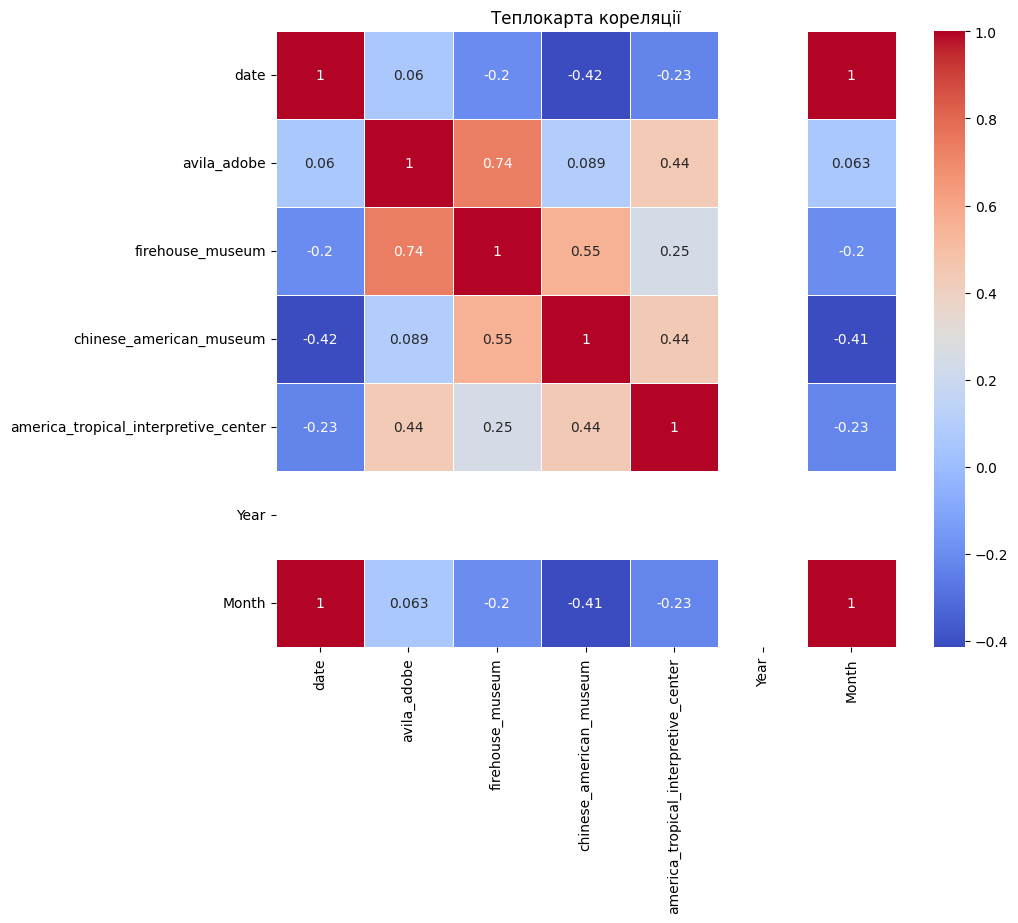

In [30]:
#Завдання 11
data['date'] = data['date'].astype(str)
data['Year'] = data['date'].str.split('-').str[0].astype(int)
data['date'] = pd.to_datetime(data['date'])
data_2016 = data[data['Year'] == 2016]

# Обчислюємо кореляцію між стовпцями (відвідувачами в музеях) та датами
correlation_matrix = data_2016.corr()

# Виводимо кореляційну матрицю
print("Кореляційна матриця:")
print(correlation_matrix)

#Завдання 12
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Теплокарта кореляції')
plt.show()

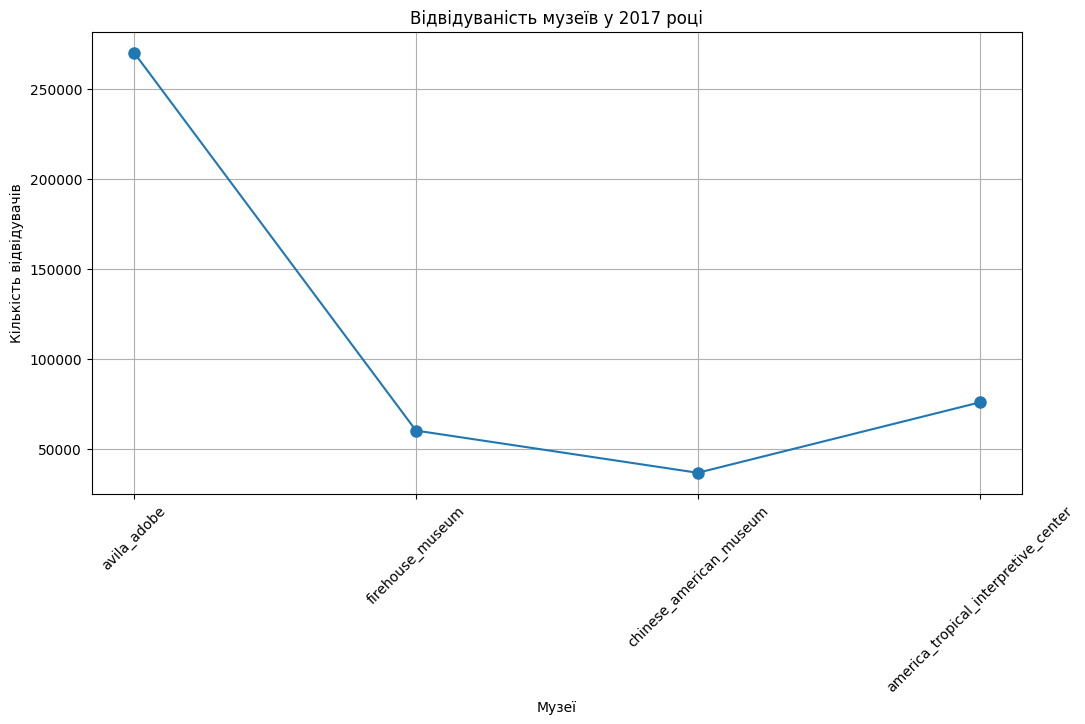

In [32]:
#Завдання 13
data['date'] = data['date'].astype(str)
data['Year'] = data['date'].str.split('-').str[0].astype(int)
data_2017 = data[data['Year'] == 2017]

visitors_2017 = data_2017[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']]
visitors_2017 = visitors_2017.sum()

# Створюємо графік ліній для кожного музею
plt.figure(figsize=(12, 6))
plt.plot(visitors_2017.index, visitors_2017.values, marker='o', linestyle='-', markersize=8)
plt.title('Відвідуваність музеїв у 2017 році')
plt.xlabel('Музеї')
plt.ylabel('Кількість відвідувачів')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

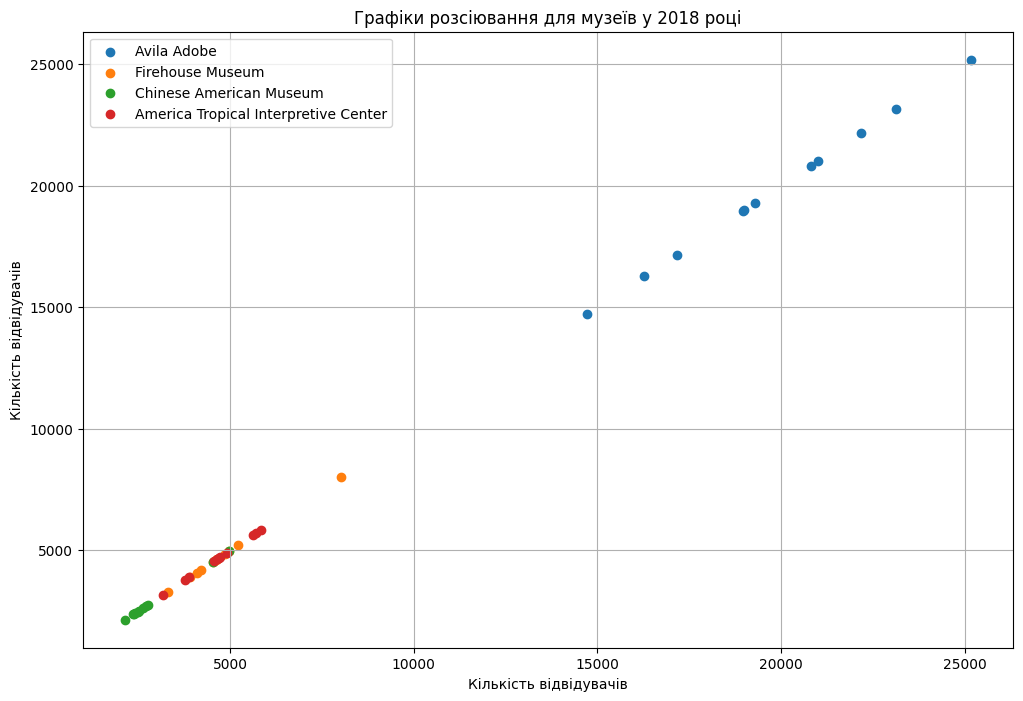

In [33]:
#Завдання 14
data['date'] = data['date'].astype(str)
data['Year'] = data['date'].str.split('-').str[0].astype(int)
data_2018 = data[data['Year'] == 2018]

# Побудова графіків розсіювання для кожного музею
plt.figure(figsize=(12, 8))

# Музей "Avila Adobe"
plt.scatter(data_2018['avila_adobe'], data_2018['avila_adobe'], label='Avila Adobe', marker='o')

# Музей "Firehouse Museum"
plt.scatter(data_2018['firehouse_museum'], data_2018['firehouse_museum'], label='Firehouse Museum', marker='o')

# Музей "Chinese American Museum"
plt.scatter(data_2018['chinese_american_museum'], data_2018['chinese_american_museum'], label='Chinese American Museum', marker='o')

# Музей "America Tropical Interpretive Center"
plt.scatter(data_2018['america_tropical_interpretive_center'], data_2018['america_tropical_interpretive_center'], label='America Tropical Interpretive Center', marker='o')

plt.title('Графіки розсіювання для музеїв у 2018 році')
plt.xlabel('Кількість відвідувачів')
plt.ylabel('Кількість відвідувачів')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\ostap\AppData\Local\Temp\ipykernel_9108\1041921446.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2014['Month'] = data_2015['date'].str.split('-').str[1].astype(int)
C:\Users\ostap\AppData\Local\Temp\ipykernel_9108\1041921446.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2015['Month'] = data_2015['date'].str.split('-').str[1].astype(int)
C:\Users\ostap\AppData\Local\Temp\ipykernel_9108\1041921446.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

ValueError: The 'color' keyword argument must have one color per dataset, but 6 datasets and 1 colors were provided

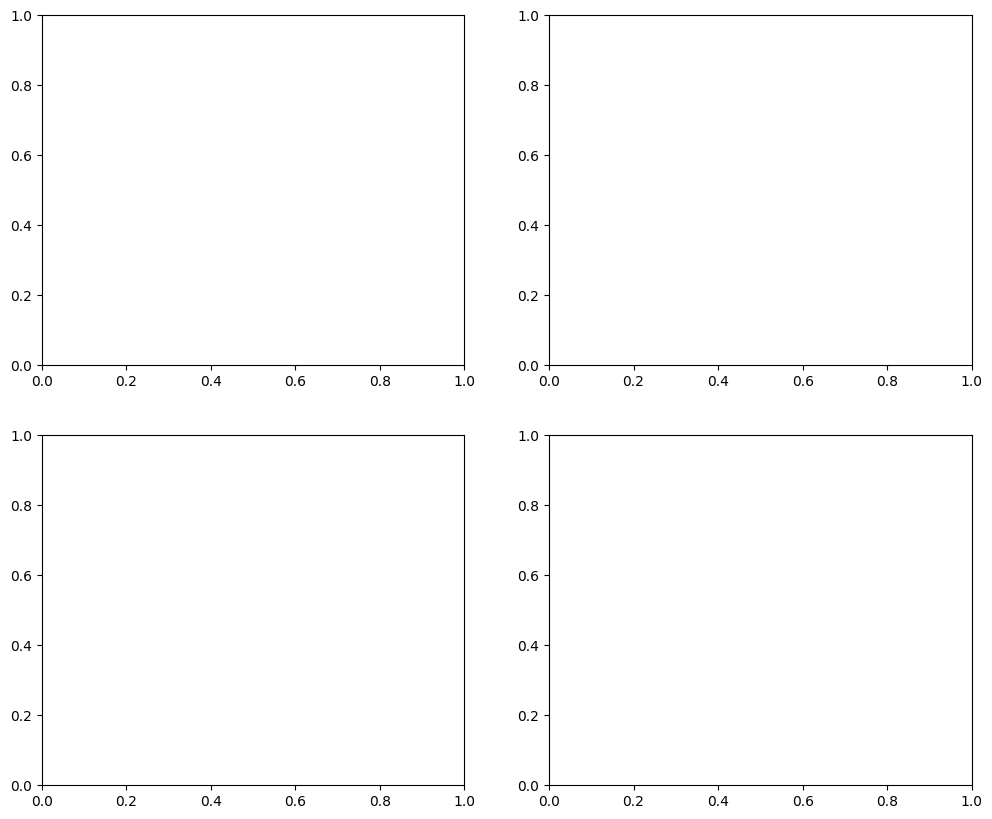

In [36]:
#Завдання 15 
sns.set(style="whitegrid")
visitors_columns = ["avila_adobe", "firehouse_museum", "chinese_american_museum", "america_tropical_interpretive_center"]
data_2014 = data[data["date"].str.startswith("2014")]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("гістограми сумарної відвідуваності музеїв за роками")
colors = ["blue", "green", "yellow", "gray"]

for i,data_year in enumerate([data_2014, data_2015, data_2016, data_2017]):
    summed_visitors = data_year[visitors_columns].sum(axis=1)
    ax = axes[i // 2, i % 2]
    sns.histplot(data=summed_visitors, bins=30, kde=True, ax=ax, color=colors[i])
    ax.set_title(f"Рік {i + 2014}")
    ax.set_xlabel("Сумарна відвідуваність")
    ax.set_ylabel("Частота")

plt.tight_layout()
plt.show()